# Content-Based Recommendation Engine

This recommendation engine takes in a seed track and outputs track recommendations based on similarity measures

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler


%matplotlib inline

## 1. Read the recommendation pool

In [43]:
#read data
chart_tracks_df=pd.read_csv("Reco Pool w Probabilities.csv")
chart_tracks_df = chart_tracks_df.dropna()
#normalize loudness and tempo
scaler = MinMaxScaler()
chart_tracks_df['loudness'] = scaler.fit_transform(chart_tracks_df[['loudness']])
chart_tracks_df['tempo'] =  scaler.fit_transform(chart_tracks_df[['tempo']])
chart_tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,streams,predicted_genre_id,predicted_genre,predicted_genre_prob,predicted_opm acoustic_prob,predicted_opm dance_prob,predicted_opm jazz_prob,predicted_opm rap_prob,predicted_opm reggae_prob,predicted_opm rock_prob
0,4IvFOa1p68SZOYfnn81vv1,Samalamig,5GdspZ491zr64zzwVJJjJZ,Shehyee,6NfArxsGcyiEJURN4NGgFc,253469,2002-12-18,2,0.859,0.667,...,1489819.0,3,opm rap,0.982463,0.000195,0.002257,0.005592,0.982463,0.008270,0.001223
1,19AlSgwI1midC2PU1TDkeF,Pekeng Kaibigan,1vcXQE9gZOF9PCAtdtT51L,Geo Ong,3A5uVKYCA9EJ6AIIIvHvdc,249085,2019-02-11,0,0.953,0.580,...,68773.0,3,opm rap,0.980860,0.000494,0.005460,0.003030,0.980860,0.009007,0.001149
2,54b8IPvheXDpro2VR2rWAS,Ivana,2EGJbNf0Hva2C2N6hvhMXD,Soulstice,10stEx5J17TekHdjeh9dOJ,246550,2020-01-06,2,0.870,0.483,...,13743952.0,3,opm rap,0.973431,0.000073,0.001958,0.001852,0.973431,0.022299,0.000387
3,5bSvsXRBUjGe8pGScU0hPz,Ivana,2EGJbNf0Hva2C2N6hvhMXD,Soulstice,2zrFpbXrA54V8lCCQQhQRA,246550,2020-01-06,0,0.871,0.480,...,4212911.0,3,opm rap,0.972775,0.000069,0.002064,0.001744,0.972775,0.022972,0.000376
4,0pobQmvHou3syiOi6DRqiC,Manila,4sEykiNSzZbkFkNXTb1bVd,Hotdog,6KnvLQbkDLy4ZEpt8ONWYR,184146,2008-06-18,2,0.801,0.538,...,28942.0,3,opm rap,0.944196,0.004161,0.006871,0.018908,0.944196,0.017624,0.008240


In [45]:
chart_tracks_df.shape

(631, 29)

## 2. Input Seed Track


In [46]:
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']

In [47]:
seed_track_data = pd.read_csv("tracks_data_with_proba.csv",index_col=0)

In [48]:
seed_track_data

,track_name,track_id,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,...,tempo,predicted_genre_id,predicted_genre,predicted_genre_prob,predicted_opm acoustic_prob,predicted_opm dance_prob,predicted_opm jazz_prob,predicted_opm rap_prob,predicted_opm reggae_prob,predicted_opm rock_prob
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
38,Lifetime,3X9c4tBzSdGhlO4Fx3WYgW,Ben&Ben,0.386,0.657,7,0.865198,1,0.0316,0.29200,...,0.999608,5,opm rock,0.772751,0.074298,0.027227,0.050168,0.029241,0.046315,0.772751
57,Balita,62y4i6e9QVug3Nf7gf7i9P,I Belong to the Zoo,0.485,0.891,2,1.000000,1,0.0539,0.00711,...,0.841267,5,opm rock,0.760666,0.022382,0.073877,0.026376,0.019883,0.096817,0.760666
45,Vie (Sabihin Mo Kung),6FmoxZRTJrSCaZR3rjEv3W,NOBITA,0.686,0.271,7,0.488786,1,0.0346,0.45800,...,0.557346,0,opm acoustic,0.724720,0.724720,0.009128,0.049510,0.095037,0.013794,0.107810
30,Paninindigan Kita,5d9Rka4T0szdC1MobhtXrV,Ben&Ben,0.624,0.596,4,0.534118,1,0.0308,0.10700,...,0.443196,5,opm rock,0.720334,0.036017,0.038701,0.064614,0.022088,0.118245,0.720334
24,Binibini,55RMhrPQYA6vLu5YMgXxFD,Zack Tabudlo,0.642,0.374,5,0.429299,1,0.0320,0.42300,...,0.581970,0,opm acoustic,0.696404,0.696404,0.007766,0.054716,0.104565,0.016624,0.119924
41,Paano Uusad,7oqMwb6Don3sa3BtzuKv0G,NOBITA,0.430,0.465,7,0.267139,1,0.0297,0.29200,...,0.666989,5,opm rock,0.690534,0.153282,0.018232,0.080152,0.037548,0.020252,0.690534
51,Balang Araw,0z6gEZUTCnAQpaAAh1xnhy,I Belong to the Zoo,0.528,0.527,7,0.773262,1,0.0272,0.07800,...,0.673370,5,opm rock,0.680188,0.107106,0.016371,0.066376,0.079255,0.050704,0.680188
15,You'll Be Safe Here,4whLOE7hwNIAykoMcSZmvO,Adie,0.376,0.130,11,0.263003,1,0.0321,0.94300,...,0.341391,0,opm acoustic,0.667071,0.667071,0.017183,0.137305,0.041380,0.004622,0.132440
35,Maybe The Night,1yDiru08Q6omDOGkZMPnei,Ben&Ben,0.572,0.522,2,0.549467,1,0.0367,0.11300,...,0.117032,5,opm rock,0.662394,0.088305,0.020630,0.101263,0.067590,0.059817,0.662394


In [49]:
chart_tracks_df = chart_tracks_df[~chart_tracks_df['track_id'].isin(seed_track_data['track_id'].unique())]

In [50]:
median = seed_track_data.median()

C:\Users\andre\AppData\Local\Temp\ipykernel_18596\3969699176.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = seed_track_data.median()


In [51]:
mean = seed_track_data.mean()

C:\Users\andre\AppData\Local\Temp\ipykernel_18596\1159803872.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = seed_track_data.mean()


## 3. Explore Similarity Measures

In [52]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity

##### Approach 1: Use audio features only

Euclidean

In [53]:
median[feature_cols].values.reshape(-1, 1)

array([[5.34000000e-01],
       [3.77000000e-01],
       [5.34316844e-01],
       [3.19500000e-02],
       [5.17500000e-01],
       [5.25000000e-07],
       [1.28500000e-01],
       [2.97500000e-01],
       [4.86492453e-01]])

In [54]:
chart_tracks_df['euclidean_dist'] = chart_tracks_df.apply(lambda x: euclidean_distances(x[feature_cols].values.reshape(-1, 1),\
                                                                  median[feature_cols].values.reshape(-1, 1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df.sort_values('euclidean_dist')[:10]
recommendation_df[['track_name','artist_name','euclidean_dist','predicted_genre']+feature_cols]

,track_name,artist_name,euclidean_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
78,Carino Brutal,Slapshock,0.000,opm rock,0.534,0.957,0.848801,0.1160,0.000031,0.000005,0.0683,0.368,0.485065
602,Ikaw At Ako (Movie Version),Moira Dela Torre,0.000,opm acoustic,0.534,0.486,0.591762,0.0316,0.666000,0.000001,0.4000,0.369,0.556768
212,Parallel Universe,Clara Benin,0.000,opm acoustic,0.534,0.025,0.156433,0.0374,0.581000,0.000020,0.1080,0.179,0.546380
468,Starting over Again,Toni Gonzaga,0.001,opm acoustic,0.535,0.441,0.756288,0.0293,0.474000,0.000001,0.1080,0.256,0.450500
507,Star Ng Pasko,Aiza Seguerra,0.002,opm acoustic,0.536,0.550,0.785171,0.0278,0.312000,0.000000,0.3470,0.175,0.269787
115,Take That Man,IV Of Spades,0.003,opm rock,0.531,0.838,0.737194,0.0386,0.000540,0.019000,0.3740,0.682,0.634965
303,My Juliana,IV Of Spades,0.003,opm rock,0.531,0.552,0.542767,0.0327,0.143000,0.000034,0.1030,0.234,0.739175
508,214,Rivermaya,0.003,opm acoustic,0.537,0.561,0.733026,0.0297,0.423000,0.000002,0.1340,0.242,0.179710
506,Out of My League,Stephen Speaks,0.004,opm acoustic,0.538,0.315,0.582990,0.0291,0.960000,0.005960,0.0979,0.400,0.269533
537,Kaibigan Mo,Sarah Geronimo,0.004,opm rock,0.530,0.534,0.661643,0.0347,0.652000,0.000000,0.1180,0.476,0.581994


Manhattan

In [55]:
chart_tracks_df['manhattan_dist'] = chart_tracks_df.apply(lambda x: manhattan_distances(x[feature_cols].values.reshape(-1, 1),\
                                                                  median[feature_cols].values.reshape(-1, 1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df.sort_values('manhattan_dist')[:10]
recommendation_df[['track_name','artist_name','manhattan_dist','predicted_genre']+feature_cols]

,track_name,artist_name,manhattan_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
78,Carino Brutal,Slapshock,0.000,opm rock,0.534,0.957,0.848801,0.1160,0.000031,0.000005,0.0683,0.368,0.485065
602,Ikaw At Ako (Movie Version),Moira Dela Torre,0.000,opm acoustic,0.534,0.486,0.591762,0.0316,0.666000,0.000001,0.4000,0.369,0.556768
212,Parallel Universe,Clara Benin,0.000,opm acoustic,0.534,0.025,0.156433,0.0374,0.581000,0.000020,0.1080,0.179,0.546380
468,Starting over Again,Toni Gonzaga,0.001,opm acoustic,0.535,0.441,0.756288,0.0293,0.474000,0.000001,0.1080,0.256,0.450500
507,Star Ng Pasko,Aiza Seguerra,0.002,opm acoustic,0.536,0.550,0.785171,0.0278,0.312000,0.000000,0.3470,0.175,0.269787
508,214,Rivermaya,0.003,opm acoustic,0.537,0.561,0.733026,0.0297,0.423000,0.000002,0.1340,0.242,0.179710
115,Take That Man,IV Of Spades,0.003,opm rock,0.531,0.838,0.737194,0.0386,0.000540,0.019000,0.3740,0.682,0.634965
303,My Juliana,IV Of Spades,0.003,opm rock,0.531,0.552,0.542767,0.0327,0.143000,0.000034,0.1030,0.234,0.739175
506,Out of My League,Stephen Speaks,0.004,opm acoustic,0.538,0.315,0.582990,0.0291,0.960000,0.005960,0.0979,0.400,0.269533
537,Kaibigan Mo,Sarah Geronimo,0.004,opm rock,0.530,0.534,0.661643,0.0347,0.652000,0.000000,0.1180,0.476,0.581994


Cosine

In [56]:
chart_tracks_df['cosine_dist'] = chart_tracks_df.apply(lambda x: 1-cosine_similarity(x[feature_cols].values.reshape(1, -1),\
                                                                  median[feature_cols].values.reshape(1, -1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df.sort_values('cosine_dist')[:10]
recommendation_df[['track_name','artist_name','cosine_dist','predicted_genre']+feature_cols]

,track_name,artist_name,cosine_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
473,We Can't Be,Krissy,0.004355,opm acoustic,0.516,0.310,0.483354,0.0279,0.565,0.000000,0.1130,0.330,0.510134
472,We Can't Be,Krissy,0.004355,opm acoustic,0.516,0.310,0.483354,0.0279,0.565,0.000000,0.1130,0.330,0.510134
469,Sana Ngayong Pasko,Silent Sanctuary,0.004804,opm acoustic,0.678,0.387,0.591035,0.0295,0.667,0.000000,0.1860,0.369,0.498456
389,Someday,Leanne & Naara,0.005175,opm acoustic,0.581,0.325,0.529731,0.0461,0.616,0.000000,0.1330,0.276,0.465845
282,Why Can't It Be,Kaye Cal,0.005491,opm acoustic,0.563,0.314,0.622535,0.0312,0.612,0.000011,0.1240,0.272,0.503159
424,Kahit Kunwari Man Lang,Agsunta,0.005735,opm acoustic,0.631,0.440,0.551151,0.0435,0.529,0.000000,0.1180,0.237,0.452161
532,Mahika,TJ Monterde,0.006452,opm acoustic,0.545,0.490,0.734819,0.0289,0.557,0.000077,0.1270,0.372,0.582554
459,Dating Tayo,TJ Monterde,0.006514,opm acoustic,0.551,0.329,0.550327,0.0431,0.648,0.000038,0.0925,0.331,0.580717
446,Heartbeats,Andrea Babierra,0.007026,opm acoustic,0.620,0.420,0.523867,0.0283,0.715,0.009410,0.1110,0.320,0.556247
447,Heartbeats,Andrea Babierra,0.007026,opm acoustic,0.620,0.420,0.523867,0.0283,0.715,0.009410,0.1110,0.320,0.556247


View histograms of the 3 similarity measures

array([[<AxesSubplot:title={'center':'euclidean_dist'}>,
        <AxesSubplot:title={'center':'manhattan_dist'}>],
       [<AxesSubplot:title={'center':'cosine_dist'}>, <AxesSubplot:>]],
      dtype=object)

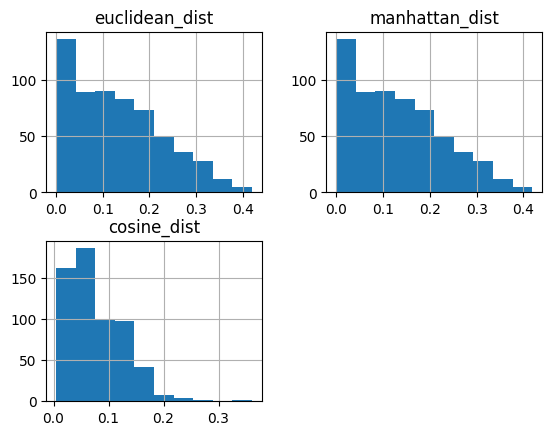

In [42]:
chart_tracks_df[['euclidean_dist','manhattan_dist','cosine_dist']].hist()

## 4. Modify similarity criteria

##### Approach 2: Audio features and with same predicted genre

In [61]:
chart_tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,predicted_genre_prob,predicted_opm acoustic_prob,predicted_opm dance_prob,predicted_opm jazz_prob,predicted_opm rap_prob,predicted_opm reggae_prob,predicted_opm rock_prob,euclidean_dist,manhattan_dist,cosine_dist
0,4IvFOa1p68SZOYfnn81vv1,Samalamig,5GdspZ491zr64zzwVJJjJZ,Shehyee,6NfArxsGcyiEJURN4NGgFc,253469,2002-12-18,2,0.859,0.667,...,0.982463,0.000195,0.002257,0.005592,0.982463,0.008270,0.001223,0.325,0.325,0.071779
1,19AlSgwI1midC2PU1TDkeF,Pekeng Kaibigan,1vcXQE9gZOF9PCAtdtT51L,Geo Ong,3A5uVKYCA9EJ6AIIIvHvdc,249085,2019-02-11,0,0.953,0.580,...,0.980860,0.000494,0.005460,0.003030,0.980860,0.009007,0.001149,0.419,0.419,0.078506
2,54b8IPvheXDpro2VR2rWAS,Ivana,2EGJbNf0Hva2C2N6hvhMXD,Soulstice,10stEx5J17TekHdjeh9dOJ,246550,2020-01-06,2,0.870,0.483,...,0.973431,0.000073,0.001958,0.001852,0.973431,0.022299,0.000387,0.336,0.336,0.093341
3,5bSvsXRBUjGe8pGScU0hPz,Ivana,2EGJbNf0Hva2C2N6hvhMXD,Soulstice,2zrFpbXrA54V8lCCQQhQRA,246550,2020-01-06,0,0.871,0.480,...,0.972775,0.000069,0.002064,0.001744,0.972775,0.022972,0.000376,0.337,0.337,0.094906
4,0pobQmvHou3syiOi6DRqiC,Manila,4sEykiNSzZbkFkNXTb1bVd,Hotdog,6KnvLQbkDLy4ZEpt8ONWYR,184146,2008-06-18,2,0.801,0.538,...,0.944196,0.004161,0.006871,0.018908,0.944196,0.017624,0.008240,0.267,0.267,0.051680


In [62]:
seed_track_data.head()

,track_name,track_id,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,...,tempo,predicted_genre_id,predicted_genre,predicted_genre_prob,predicted_opm acoustic_prob,predicted_opm dance_prob,predicted_opm jazz_prob,predicted_opm rap_prob,predicted_opm reggae_prob,predicted_opm rock_prob
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
38,Lifetime,3X9c4tBzSdGhlO4Fx3WYgW,Ben&Ben,0.386,0.657,7,0.865198,1,0.0316,0.29200,...,0.999608,5,opm rock,0.772751,0.074298,0.027227,0.050168,0.029241,0.046315,0.772751
57,Balita,62y4i6e9QVug3Nf7gf7i9P,I Belong to the Zoo,0.485,0.891,2,1.000000,1,0.0539,0.00711,...,0.841267,5,opm rock,0.760666,0.022382,0.073877,0.026376,0.019883,0.096817,0.760666
45,Vie (Sabihin Mo Kung),6FmoxZRTJrSCaZR3rjEv3W,NOBITA,0.686,0.271,7,0.488786,1,0.0346,0.45800,...,0.557346,0,opm acoustic,0.724720,0.724720,0.009128,0.049510,0.095037,0.013794,0.107810
30,Paninindigan Kita,5d9Rka4T0szdC1MobhtXrV,Ben&Ben,0.624,0.596,4,0.534118,1,0.0308,0.10700,...,0.443196,5,opm rock,0.720334,0.036017,0.038701,0.064614,0.022088,0.118245,0.720334
24,Binibini,55RMhrPQYA6vLu5YMgXxFD,Zack Tabudlo,0.642,0.374,5,0.429299,1,0.0320,0.42300,...,0.581970,0,opm acoustic,0.696404,0.696404,0.007766,0.054716,0.104565,0.016624,0.119924


In [73]:
seed_track_data.columns

Index(['track_name', 'track_id', 'artist_name', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'predicted_genre_id', 'predicted_genre', 'predicted_genre_prob',
       'predicted_opm acoustic_prob', 'predicted_opm dance_prob',
       'predicted_opm jazz_prob', 'predicted_opm rap_prob',
       'predicted_opm reggae_prob', 'predicted_opm rock_prob'],
      dtype='object')

In [74]:
chart_tracks_df.columns

Index(['track_id', 'track_name', 'artist_id', 'artist_name', 'album_id',
       'duration', 'release_date', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'streams',
       'predicted_genre_id', 'predicted_genre', 'predicted_genre_prob',
       'predicted_opm acoustic_prob', 'predicted_opm dance_prob',
       'predicted_opm jazz_prob', 'predicted_opm rap_prob',
       'predicted_opm reggae_prob', 'predicted_opm rock_prob',
       'euclidean_dist', 'manhattan_dist', 'cosine_dist'],
      dtype='object')

In [75]:
seed_track_data.mean()

C:\Users\andre\AppData\Local\Temp\ipykernel_18596\854078155.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  seed_track_data.mean()


danceability                   0.536672
energy                         0.403828
key                            5.965517
loudness                       0.511367
mode                           0.879310
speechiness                    0.037659
acousticness                   0.524286
instrumentalness               0.002667
liveness                       0.179264
valence                        0.318722
tempo                          0.488628
predicted_genre_id             1.879310
predicted_genre_prob           0.544681
predicted_opm acoustic_prob    0.362703
predicted_opm dance_prob       0.026961
predicted_opm jazz_prob        0.146491
predicted_opm rap_prob         0.100395
predicted_opm reggae_prob      0.028239
predicted_opm rock_prob        0.335212
dtype: float64

In [66]:
chart_tracks_df['predicted_genre']

0           opm rap
1           opm rap
2           opm rap
3           opm rap
4           opm rap
           ...     
624        opm jazz
625        opm jazz
626       opm dance
627    opm acoustic
630         opm rap
Name: predicted_genre, Length: 602, dtype: object

In [79]:
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['predicted_genre']=="opm acoustic"]\
                                    .sort_values('cosine_dist')[:10]
recommendation_df[['track_name','artist_name','cosine_dist','predicted_genre']+feature_cols]

,track_name,artist_name,cosine_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
472,We Can't Be,Krissy,0.004355,opm acoustic,0.516,0.310,0.483354,0.0279,0.565,0.000000,0.1130,0.330,0.510134
473,We Can't Be,Krissy,0.004355,opm acoustic,0.516,0.310,0.483354,0.0279,0.565,0.000000,0.1130,0.330,0.510134
469,Sana Ngayong Pasko,Silent Sanctuary,0.004804,opm acoustic,0.678,0.387,0.591035,0.0295,0.667,0.000000,0.1860,0.369,0.498456
389,Someday,Leanne & Naara,0.005175,opm acoustic,0.581,0.325,0.529731,0.0461,0.616,0.000000,0.1330,0.276,0.465845
282,Why Can't It Be,Kaye Cal,0.005491,opm acoustic,0.563,0.314,0.622535,0.0312,0.612,0.000011,0.1240,0.272,0.503159
424,Kahit Kunwari Man Lang,Agsunta,0.005735,opm acoustic,0.631,0.440,0.551151,0.0435,0.529,0.000000,0.1180,0.237,0.452161
532,Mahika,TJ Monterde,0.006452,opm acoustic,0.545,0.490,0.734819,0.0289,0.557,0.000077,0.1270,0.372,0.582554
459,Dating Tayo,TJ Monterde,0.006514,opm acoustic,0.551,0.329,0.550327,0.0431,0.648,0.000038,0.0925,0.331,0.580717
447,Heartbeats,Andrea Babierra,0.007026,opm acoustic,0.620,0.420,0.523867,0.0283,0.715,0.009410,0.1110,0.320,0.556247
446,Heartbeats,Andrea Babierra,0.007026,opm acoustic,0.620,0.420,0.523867,0.0283,0.715,0.009410,0.1110,0.320,0.556247


##### Approach 3: Predicted genre probabilities

In [80]:
genre_cols = [col for col in chart_tracks_df.columns if ('predicted_' in col)&('genre' not in col)]
genre_cols

['predicted_opm acoustic_prob',
 'predicted_opm dance_prob',
 'predicted_opm jazz_prob',
 'predicted_opm rap_prob',
 'predicted_opm reggae_prob',
 'predicted_opm rock_prob']

In [ ]:
genre_cols

In [85]:
seed_track_data[cols].values.reshape(1, -1).flatten()[0]

0.0742978961196232

In [88]:
genre_cols = [col for col in chart_tracks_df.columns if ('predicted_' in col)&('genre' not in col)]
cols = genre_cols
#cosine distance of audio features and predicted genre probabilities
chart_tracks_df['cosine_dist_mod1'] = chart_tracks_df.apply(lambda x: 1-cosine_similarity(x[cols].values.reshape(1, -1),\
                                                                  median[cols].values.reshape(1, -1))\
                                                                  .flatten()[0], axis=1)
recommendation_df = chart_tracks_df.sort_values('cosine_dist_mod1')[:10]
recommendation_df[['track_id','track_name','artist_name','cosine_dist_mod1','predicted_genre']+cols]

,track_id,track_name,artist_name,cosine_dist_mod1,predicted_genre,predicted_opm acoustic_prob,predicted_opm dance_prob,predicted_opm jazz_prob,predicted_opm rap_prob,predicted_opm reggae_prob,predicted_opm rock_prob
565,5f9808hpiCpuNyqqdXmpF2,Buwan,juan karlos,0.004055,opm acoustic,0.400655,0.015961,0.147749,0.113885,0.013113,0.308638
502,6pTTEPXrL8STDDeudUCt7z,A Christmas Carol,Jose Mari Chan,0.005687,opm acoustic,0.459325,0.046665,0.114524,0.047852,0.010978,0.320657
516,6TbDpqKCksZNJjriFhPum8,Could I Love You Any More (feat. Jason Mraz),Reneé Dominique,0.006432,opm acoustic,0.448063,0.042135,0.098895,0.073861,0.007742,0.329302
556,3OpGUlDmRUXh0NkIYWoIlD,Your Song,Parokya Ni Edgar,0.007654,opm acoustic,0.411439,0.030564,0.113429,0.039419,0.049835,0.355314
523,6VeOvyaMBynIqMSY5uZpfx,Gusto Kita,Angeline Quinto,0.007886,opm acoustic,0.443662,0.028896,0.100767,0.045313,0.015685,0.365677
558,02GtNoUv85fOPEaCTlpYzr,"Kapit (From ""Alone / Together"")",Armi Millare,0.007920,opm acoustic,0.411106,0.051524,0.115762,0.042248,0.013456,0.365904
575,1FHCU1rDAeaPsBW9byjJ0Q,12:51,krissy & ericka,0.008073,opm acoustic,0.393003,0.039690,0.206633,0.035148,0.017636,0.307892
602,459mgeXCLhqviFmgP2pYOo,Ikaw At Ako (Movie Version),Moira Dela Torre,0.008207,opm acoustic,0.367295,0.030835,0.184017,0.046482,0.022483,0.348888
473,696Gt2ZDsC1cxXEZo02azD,We Can't Be,Krissy,0.008254,opm acoustic,0.486899,0.024878,0.114284,0.031979,0.009775,0.332185
472,0mqJsNkF3MRtBkRhzVskVX,We Can't Be,Krissy,0.008254,opm acoustic,0.486899,0.024878,0.114284,0.031979,0.009775,0.332185


##### Approach 4: Audio features and predicted genre probabilities

In [89]:
feature_cols + genre_cols

['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'predicted_opm acoustic_prob',
 'predicted_opm dance_prob',
 'predicted_opm jazz_prob',
 'predicted_opm rap_prob',
 'predicted_opm reggae_prob',
 'predicted_opm rock_prob']

In [98]:
genre_cols = [col for col in chart_tracks_df.columns if ('predicted_' in col)&('genre' not in col)]
cols = feature_cols + genre_cols
#cosine distance of audio features and predicted genre probabilities
chart_tracks_df['cosine_dist_mod2'] = chart_tracks_df.apply(lambda x: 1-cosine_similarity(x[cols].values.reshape(1, -1),\
                                                                  median[cols].values.reshape(1, -1))\
                                                                  .flatten()[0], axis=1)
recommendation_df = chart_tracks_df.sort_values('cosine_dist_mod2')
recommendation_df[['track_id','track_name','artist_name','cosine_dist_mod2','predicted_genre']+cols]

,track_id,track_name,artist_name,cosine_dist_mod2,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,predicted_opm acoustic_prob,predicted_opm dance_prob,predicted_opm jazz_prob,predicted_opm rap_prob,predicted_opm reggae_prob,predicted_opm rock_prob
565,5f9808hpiCpuNyqqdXmpF2,Buwan,juan karlos,0.007719,opm acoustic,0.631,0.381,0.498134,0.0400,0.44700,0.000171,0.0902,0.3600,0.491546,0.400655,0.015961,0.147749,0.113885,0.013113,0.308638
473,696Gt2ZDsC1cxXEZo02azD,We Can't Be,Krissy,0.009060,opm acoustic,0.516,0.310,0.483354,0.0279,0.56500,0.000000,0.1130,0.3300,0.510134,0.486899,0.024878,0.114284,0.031979,0.009775,0.332185
472,0mqJsNkF3MRtBkRhzVskVX,We Can't Be,Krissy,0.009060,opm acoustic,0.516,0.310,0.483354,0.0279,0.56500,0.000000,0.1130,0.3300,0.510134,0.486899,0.024878,0.114284,0.031979,0.009775,0.332185
459,267RumTt5KeLBGl2KWxBL0,Dating Tayo,TJ Monterde,0.009688,opm acoustic,0.551,0.329,0.550327,0.0431,0.64800,0.000038,0.0925,0.3310,0.580717,0.495323,0.025533,0.178313,0.062585,0.012826,0.225419
469,4NZJUFjccdGUfRb7z7Igbd,Sana Ngayong Pasko,Silent Sanctuary,0.009811,opm acoustic,0.678,0.387,0.591035,0.0295,0.66700,0.000000,0.1860,0.3690,0.498456,0.489790,0.023962,0.209430,0.067487,0.017946,0.191384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,1kORxnBnxk57ZDioKp9pQD,Kuwaderno,Ben&Ben,0.317895,opm acoustic,0.227,0.349,0.265132,0.0343,0.86700,0.877000,0.1140,0.0856,0.232825,0.548691,0.035501,0.170697,0.120337,0.004059,0.120714
41,0AiUFrU3Bj0ZzYFSWoAM0O,Esmi,Because,0.337644,opm rap,0.783,0.370,0.397965,0.1170,0.13500,0.000000,0.0742,0.4030,0.165609,0.017281,0.018440,0.027361,0.833106,0.088368,0.015443
46,7tQ2P3dP76bj1aSEfe8StO,Dantay,Kiyo,0.348541,opm rap,0.387,0.360,0.273807,0.3120,0.81200,0.001950,0.0936,0.1400,0.130901,0.004202,0.002520,0.157555,0.825577,0.009364,0.000782
50,5LZqOdfYUXunyhHmPqGI6j,Lexi,Nik Makino,0.395129,opm rap,0.704,0.481,0.498716,0.3720,0.00265,0.000000,0.1100,0.1780,0.159266,0.000073,0.004562,0.002009,0.816135,0.176458,0.000763


In [93]:
recommendation_df['track_id'].values

array(['5f9808hpiCpuNyqqdXmpF2', '696Gt2ZDsC1cxXEZo02azD',
       '0mqJsNkF3MRtBkRhzVskVX', '267RumTt5KeLBGl2KWxBL0',
       '4NZJUFjccdGUfRb7z7Igbd', '3gkwEytdCYIsrFdfEE2ALW',
       '1FHCU1rDAeaPsBW9byjJ0Q', '5uBWj5DHsKw3DayLOuh7by',
       '2B8ThVsaxp4aFeY5GnKNhS', '7bkAr4WNoTuSjpuh1NRQjm'], dtype=object)

In [99]:
reco_list = recommendation_df[['track_id','track_name','artist_name','cosine_dist_mod2','predicted_genre']+cols]

In [101]:
reco_list.to_csv("Song Recommendations2.csv", index=False, encoding='utf-8')